# Evaluate classification results per cancer type, Figure2

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from scipy import stats
import sys,os
from collections import defaultdict, Counter
from matplotlib import patches
from matplotlib.colors import LinearSegmentedColormap

In [4]:
print(sys.version)

3.8.6 (default, Dec 18 2020, 08:42:53) 
[Clang 11.0.0 ]


In [5]:
%pip list | grep -e "numpy" -e "pandas" -e "matplotlib" -e "scipy" -e "seaborn"

matplotlib                        3.3.4
matplotlib-venn                   0.11.6
numpy                             1.20.2
pandas                            1.2.4
scipy                             1.6.0
seaborn                           0.11.1
You should consider upgrading via the '/Users/takamatsushiro/.pyenv/versions/3.8.6/envs/default/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=4,3
plt.rcParams['figure.dpi']=300
plt.rcParams['axes.linewidth'] =0.5
plt.rcParams['lines.linewidth'] =0.5
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# set font size
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  

In [7]:
store="../results/"

In [8]:
# import data
df=pd.read_csv("../data/TCGA_integrated_data_after_clustering.tsv"
               ,sep="\t",index_col=0)

In [9]:
cluster_colors=['red', 'blue', 'green', "brown", 'purple', 'hotpink',"c",'y']
dict_cluster_colors={"SMK":'red', "UVL":'blue', "APB":'green', "POL":'brown', "MRD":'purple',\
                     "HRD":'hotpink',"GNS":"c","AGE":"y",np.nan:"grey","UND":"grey"}
cluster_orders=["SMK","UVL","APB","POL","MRD","HRD","GNS","AGE"]
dict_cluster_order_number={ "SMK":0,"UVL":1,"APB":2,"POL":3,"MRD":4,"HRD":5,"GNS":6,"AGE":7,np.nan:8}

cluster_colors2=['red', 'blue', 'green', "brown", 'purple', 'hotpink',"c",'y',"grey"]
cluster_orders2=["SMK","UVL","APB","POL","MRD","HRD","GNS","AGE","UND"]
dict_cluster_order_number2={ "SMK":0,"UVL":1,"APB":2,"POL":3,"MRD":4,"HRD":5,"GNS":6,"AGE":7,np.nan:8,"UND":8}

# Compare subtype ratio per cancer type

In [10]:
tcga_count=pd.crosstab(df["cluster_m2_names"],df["CancerType"])
tcga_count=tcga_count.reindex(cluster_orders,axis=0).fillna(0)
tcga_ratio=tcga_count.apply(lambda x: x/np.sum(x) )*100
tcga_ratio

CancerType,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM
cluster_m2_names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25


In [11]:
# make cancer colors
rgbs1=sns.color_palette("tab20", 20)
rgbs2=sns.color_palette("tab20b", 20)
rgbs1_3=[] 
for i,x in enumerate(rgbs1):
    if (i%4)!=0:
        rgbs1_3.append(x)
rgbs2_3=[] 
for i,x in enumerate(rgbs2):
    if (i%4)!=0:
        rgbs2_3.append(x)

cancer30_colors = sns.color_palette(rgbs1_3+rgbs2_3, 30)

In [12]:
cancers_freq_order=[x[0] for x in Counter( df["CancerType"]).most_common()]

In [13]:
dict_cancer_colors={ cancer:color for cancer,color in zip(cancers_freq_order,cancer30_colors)}
dict_cancer_colors["Others"]="whitesmoke"
dict_cancer_colors[""]="whitesmoke"

In [14]:
dict_cancer_colors

{'BRCA': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'CRC': (1.0, 0.4980392156862745, 0.054901960784313725),
 'UCEC': (1.0, 0.7333333333333333, 0.47058823529411764),
 'LUAD': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'HNSC': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'LGG': (1.0, 0.596078431372549, 0.5882352941176471),
 'PRAD': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'LUSC': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'THCA': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'SKCM': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 'STAD': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'OV': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 'BLCA': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 'GBM': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 'LIHC': (0.6196078431372549, 0.8549019607843137, 0.

In [15]:
bwr=LinearSegmentedColormap.from_list('bwr', [(0,"blue"),(0.5,"w"),(1,"red")] )
wk=LinearSegmentedColormap.from_list('wk', [(0,"w"),(1,"k")] )
wr=LinearSegmentedColormap.from_list('wr', [(0,"w"),(1,"red")] )

In [16]:
nbdc=pd.read_csv("../data/NBDC_tgs.tsv",sep="\t",index_col=0)
nbdc.head()

,KNN,SVC,RF,LR,TGS,Details,irGS,CancerType
UCEC12,APB,APB,APB,APB,APB,APB:4,1,UCEC
UCEC05,POL,POL,POL,POL,POL,POL:4,1,UCEC
UCEC10,POL,POL,POL,POL,POL,POL:4,1,UCEC
UCEC13,POL,POL,POL,POL,POL,POL:4,1,UCEC
UCEC26,POL,POL,POL,POL,POL,POL:4,1,UCEC


In [17]:
Counter(nbdc["CancerType"])

Counter({'UCEC': 69,
         'BRCA': 64,
         'CRC': 83,
         'HSOC': 62,
         'LUAD': 43,
         'STAD': 56,
         'TNBC': 36})

In [18]:
nbdc_count=pd.crosstab( nbdc["TGS"], nbdc["CancerType"])
nbdc_count.drop("UND",inplace=True)
nbdc_count=nbdc_count.reindex(cluster_orders,axis=0).fillna(0)
nbdc_count=nbdc_count.drop(["TNBC","STAD"],axis=1)
nbdc_count.rename(columns={"HSOC":"OV"},inplace=True)
nbdc_ratio=nbdc_count.apply(lambda x: x/np.sum(x) )*100
nbdc_ratio

CancerType,BRCA,CRC,OV,LUAD,UCEC
TGS,,,,,
SMK,0.000000,0.000000,0.000000,41.463415,0.000000
UVL,0.000000,0.000000,0.000000,0.000000,0.000000
APB,19.354839,0.000000,1.639344,9.756098,1.470588
POL,0.000000,1.219512,0.000000,0.000000,16.176471
MRD,0.000000,2.439024,0.000000,0.000000,22.058824
HRD,29.032258,18.292683,90.163934,19.512195,4.411765
GNS,3.225806,0.000000,1.639344,9.756098,1.470588
AGE,48.387097,78.048780,6.557377,19.512195,54.411765


In [19]:
total_ratio=tcga_ratio.copy()

add=nbdc_ratio.copy()
add.columns=[x+"_NBDC" for x in add.columns]
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,UCEC_NBDC
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,0.000000
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,1.470588
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,16.176471
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,22.058824
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,4.411765
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75,3.225806,0.000000,1.639344,9.756098,1.470588
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25,48.387097,78.048780,6.557377,19.512195,54.411765


In [20]:
cptac=pd.read_csv("../data/CPTAC_integrated.tsv",sep="\t")

In [21]:
Counter(cptac["CancerType2"])

Counter({'PAAD': 132,
         'KRC': 109,
         'HNC': 108,
         'UCEC': 100,
         'LUAD': 109,
         'LUSC': 108,
         'BRN': 99,
         'CRC': 105,
         'BRCA': 126,
         'HSOC': 95})

In [22]:
cptac_count=pd.crosstab(cptac["TGS"],cptac["CancerType2"])
cptac_count=cptac_count.reindex(cluster_orders,axis=0).fillna(0)
cptac_count.rename(columns={"HSOC":"OV"},inplace=True)
cptac_ratio=cptac_count.apply(lambda x: x/np.sum(x) )*100
cptac_ratio

CancerType2,BRCA,BRN,CRC,HNC,OV,KRC,LUAD,LUSC,PAAD,UCEC
TGS,,,,,,,,,,
SMK,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000
UVL,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
APB,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408
POL,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265
MRD,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020
HRD,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.784314,6.923077,5.102041
GNS,5.737705,1.030928,0.000000,1.020408,0.000000,12.0,5.714286,1.960784,3.846154,2.040816
AGE,45.901639,89.690722,68.627451,33.673469,24.731183,18.0,24.761905,0.980392,86.153846,56.122449


In [23]:
add=cptac_ratio.copy()
add.columns=[x+"_CPTAC" for x in add.columns]
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,22.058824,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,4.411765,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.784314,6.923077,5.102041
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75,3.225806,0.000000,1.639344,9.756098,1.470588,5.737705,1.030928,0.000000,1.020408,0.000000,12.0,5.714286,1.960784,3.846154,2.040816
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25,48.387097,78.048780,6.557377,19.512195,54.411765,45.901639,89.690722,68.627451,33.673469,24.731183,18.0,24.761905,0.980392,86.153846,56.122449


In [24]:
keynotes=pd.read_csv("../data/KEYNOTEs_all_tgs.tsv",sep="\t")

In [25]:
keynotes_s=pd.read_csv("../data/KEYNOTEs_HNSC_SKCM_tgs.tsv",sep="\t")

In [26]:
keynotes_count=pd.crosstab(keynotes_s["TGS"],keynotes_s["CancerType"])
keynotes_count=keynotes_count.reindex(cluster_orders,axis=0).fillna(0)
keynotes_ratio=keynotes_count.apply(lambda x: x/np.sum(x) )*100
keynotes_ratio

CancerType,HNSC,SKCM
TGS,,
SMK,13.0,0.000000
UVL,2.0,83.720930
APB,35.0,0.000000
POL,0.0,0.000000
MRD,0.0,0.000000
HRD,14.0,11.627907
GNS,0.0,0.000000
AGE,36.0,4.651163


In [27]:
add=keynotes_ratio.copy()
add.columns=[x+"_KEYNOTE" for x in add.columns]
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC,HNSC_KEYNOTE,SKCM_KEYNOTE
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000,13.0,0.000000
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,83.720930
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408,35.0,0.000000
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265,0.0,0.000000
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,22.058824,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020,0.0,0.000000
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,4.411765,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.784314,6.923077,5.102041,14.0,11.627907
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75,3.225806,0.000000,1.639344,9.756098,1.470588,5.737705,1.030928,0.000000,1.020408,0.000000,12.0,5.714286,1.960784,3.846154,2.040816,0.0,0.000000
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25,48.387097,78.048780,6.557377,19.512195,54.411765,45.901639,89.690722,68.627451,33.673469,24.731183,18.0,24.761905,0.980392,86.153846,56.122449,36.0,4.651163


In [28]:
import glob
files=glob.glob("../data/tgs_results/*tgs.tsv")
files=sorted(files)
names=[os.path.basename(x).replace("_tgs.tsv","") for x in files]
names

['blca_bgi',
 'blca_cornell_2016',
 'blca_dfarber_mskcc_2014',
 'brca_broad',
 'brca_sanger',
 'ccrcc_dfci_2019',
 'coadread_dfci_2016',
 'coadread_genentech',
 'hnsc_broad',
 'lgg_ucsf_2014',
 'luad_broad',
 'luad_mskcc_2015',
 'mel_dfci_2019',
 'mel_ucla_2016',
 'mixed_allen_2018_blca',
 'mixed_allen_2018_lung',
 'mixed_allen_2018_mel',
 'nsclc_mskcc_2018',
 'paad_icgc',
 'paad_utsw_2015',
 'skcm_dfci_2015']

In [29]:
all_ratio, all_count=pd.DataFrame(), pd.DataFrame()
for path,name in zip(files,names):
    tmp_df=pd.read_csv(path,sep="\t")
    print(name,len(tmp_df))
    tmp_df.rename(columns={"Unnamed: 0":name},inplace=True)
    tmp_df=tmp_df[tmp_df["TGS"]!="UND"]
    count=tmp_df.groupby("TGS").count()[[name]].reindex(index=cluster_orders).fillna(0)
    ratio=count/np.sum(count)*100
    all_ratio=pd.concat( [all_ratio,ratio],axis=1)
    all_count=pd.concat( [all_count,count],axis=1)

blca_bgi 99
blca_cornell_2016 72
blca_dfarber_mskcc_2014 50
brca_broad 103
brca_sanger 100
ccrcc_dfci_2019 35
coadread_dfci_2016 619
coadread_genentech 72
hnsc_broad 74
lgg_ucsf_2014 61
luad_broad 158
luad_mskcc_2015 34
mel_dfci_2019 144
mel_ucla_2016 37
mixed_allen_2018_blca 27
mixed_allen_2018_lung 57
mixed_allen_2018_mel 151
nsclc_mskcc_2018 75
paad_icgc 99
paad_utsw_2015 109
skcm_dfci_2015 110


In [30]:
add=all_ratio.copy()
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC,HNSC_KEYNOTE,SKCM_KEYNOTE,blca_bgi,blca_cornell_2016,blca_dfarber_mskcc_2014,brca_broad,brca_sanger,ccrcc_dfci_2019,coadread_dfci_2016,coadread_genentech,hnsc_broad,lgg_ucsf_2014,luad_broad,luad_mskcc_2015,mel_dfci_2019,mel_ucla_2016,mixed_allen_2018_blca,mixed_allen_2018_lung,mixed_allen_2018_mel,nsclc_mskcc_2018,paad_icgc,paad_utsw_2015,skcm_dfci_2015
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000,13.0,0.000000,2.173913,8.571429,2.040816,0.000000,0.0,0.000000,0.324675,0.000000,11.111111,0.000000,64.516129,58.064516,0.000000,0.000000,0.0,49.056604,0.689655,58.666667,0.000000,0.000000,0.925926
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,83.720930,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.784173,89.189189,0.0,0.000000,77.241379,1.333333,0.000000,0.000000,63.888889
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408,35.0,0.000000,46.739130,68.571429,85.714286,9.183673,13.0,0.000000,0.162338,1.388889,22.222222,0.000000,2.580645,3.225806,0.000000,0.000000,88.0,20.754717,0.000000,5.333333,0.000000,0.000000,0.000000
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.974026,2.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,22.058824,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020,0.0,0.000000,0.000000,1.428571,0.000000,0.000000,0.0,0.000000,18.668831,20.833333,0.000000,1.785714,0.645161,0.000000,0.719424,0.000000,0.0,0.000000,0.689655,2.666667,0.000000,0.000000,0.000000
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,4.411765,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.78431

In [31]:
cancertype="LUNG"
dfs=[ tcga_count[["LUSC","LUAD"]],
     cptac_count[["LUSC","LUAD"]],
     nbdc_count["LUAD"],
     all_count[['luad_broad',"nsclc_mskcc_2018",
                   'mixed_allen_2018_lung',"luad_mskcc_2015"]]]
names=["TCGA LUSC","TCGA LUAD","CPTAC LUSC","CPTAC LUAD","NBDC LUAD",
       'luad_broad',"nsclc_mskcc_2018", 'mixed_allen_2018_lung',"luad_mskcc_2015"]

TCGA LUSC [n=492]
TCGA LUAD [n=515]
CPTAC LUSC [n=102]
CPTAC LUAD [n=105]
NBDC LUAD [n=41]
luad_broad [n=155]
nsclc_mskcc_2018 [n=75]
mixed_allen_2018_lung [n=53]
luad_mskcc_2015 [n=31]


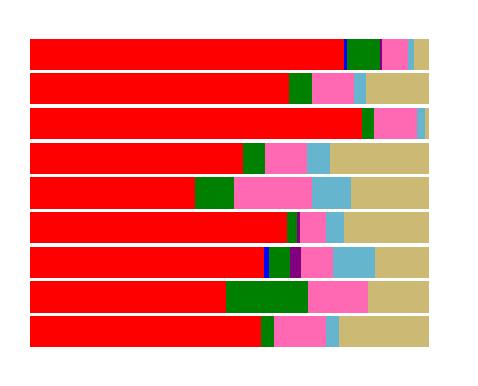

In [32]:
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()
#plt.savefig(store+"Subtype_frequency_comp_"+cancertype+".png",dpi=300,bbox_inches="tight")

In [33]:
cancertype="SKCM"
dfs=[ tcga_count[cancertype], 
     keynotes_count[cancertype],
     all_count["mixed_allen_2018_mel"],
     all_count["mel_dfci_2019"],
     all_count['skcm_dfci_2015'],
     all_count['mel_ucla_2016']]
names=["TCGA","KEYNOTE",
       'mixed_allen_2018_mel',"mel_dfci_2019",'skcm_dfci_2015','mel_ucla_2016']

TCGA [n=467]
KEYNOTE [n=86]
mixed_allen_2018_mel [n=145]
mel_dfci_2019 [n=139]
skcm_dfci_2015 [n=108]
mel_ucla_2016 [n=37]


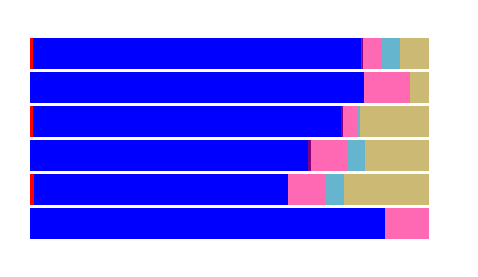

In [34]:
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

In [35]:
cancertype="BLCA"
dfs=[ tcga_count[cancertype],
     all_count[[
         "blca_bgi", 'blca_cornell_2016',
 'blca_dfarber_mskcc_2014','mixed_allen_2018_blca']] ] 
names=["TCGA",
       "blca_bgi",'blca_cornell_2016', 'blca_dfarber_mskcc_2014'
        ,'mixed_allen_2018_blca']

TCGA [n=412]
blca_bgi [n=92]
blca_cornell_2016 [n=70]
blca_dfarber_mskcc_2014 [n=49]
mixed_allen_2018_blca [n=25]


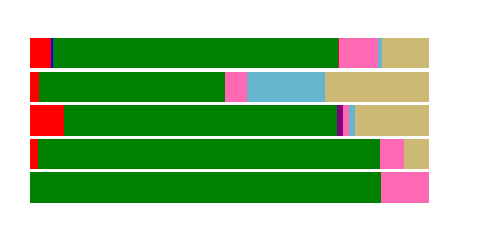

In [36]:
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=985]
CPTAC [n=122]
NBDC [n=62]
brca_sanger [n=100]
brca_broad [n=98]


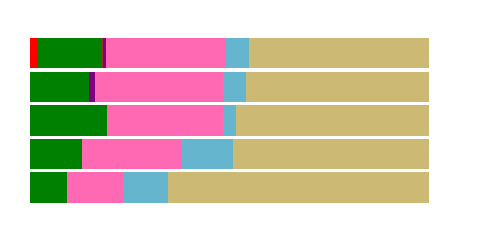

In [37]:
cancertype="BRCA"
dfs=[tcga_count[cancertype],
     cptac_count[cancertype],
     nbdc_count[cancertype],
     all_count[['brca_sanger','brca_broad']] ]
names=["TCGA","CPTAC","NBDC",  'brca_sanger','brca_broad']

input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=533]
CPTAC [n=102]
NBDC [n=82]
coadread_dfci_2016 [n=616]
coadread_genentech [n=72]


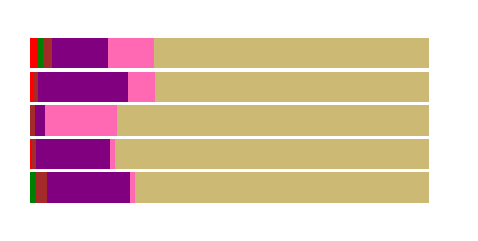

In [38]:
cancertype="CRC"
dfs=[tcga_count[cancertype],
     cptac_count[cancertype],
     nbdc_count[cancertype],
     all_count[["coadread_dfci_2016",'coadread_genentech',]] ]
names=["TCGA","CPTAC","NBDC",
       "coadread_dfci_2016",'coadread_genentech',]

input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

HNSC
TCGA [n=507]
CPTAC [n=98]
KEYNOTE [n=100]
hnsc_broad [n=72]


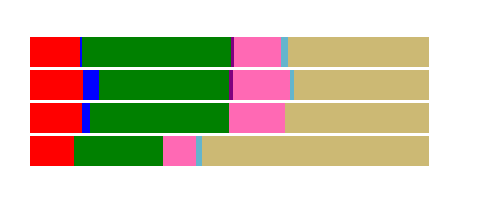

In [39]:
cancertype="HNSC"
dfs=[ tcga_count[cancertype], cptac_count["HNC"],keynotes_count[cancertype],
     all_count['hnsc_broad']]
names=["TCGA","CPTAC", 'KEYNOTE','hnsc_broad']

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

RCC
TCGA KIRC [n=336]
TCGA KIRP [n=281]
CPTAC KRC [n=100]
ccrcc_dfci_2019 [n=31]


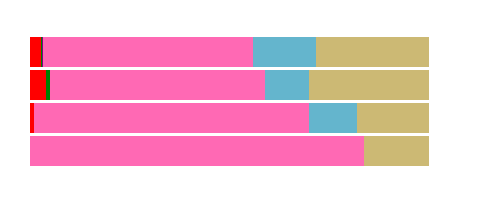

In [40]:
cancertype="RCC"
dfs=[ tcga_count["KIRC"], tcga_count["KIRP"], cptac_count["KRC"], 
     all_count['ccrcc_dfci_2019' ]]
names=["TCGA KIRC","TCGA KIRP","CPTAC KRC",     
       'ccrcc_dfci_2019',]

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

BRN
TCGA GBM [n=390]
TCGA LGG [n=507]
CPTAC BRN [n=97]
lgg_ucsf_2014 [n=56]


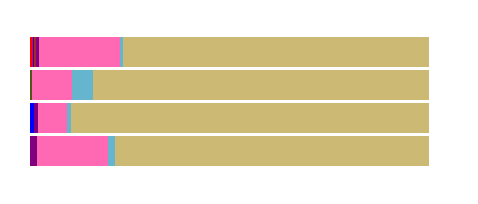

In [41]:
cancertype="BRN"
dfs=[ tcga_count[["GBM","LGG"]], cptac_count["BRN"],all_count[[ 'lgg_ucsf_2014',]]]
names=["TCGA GBM","TCGA LGG",  "CPTAC BRN", 'lgg_ucsf_2014']

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

PAAD
TCGA [n=177]
CPTAC [n=130]
paad_utsw_2015 [n=106]
paad_icgc [n=97]


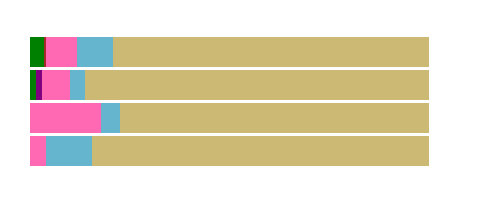

In [42]:
cancertype="PAAD"
dfs=[ tcga_count["PAAD"] , cptac_count["PAAD"] ,all_count[['paad_utsw_2015','paad_icgc',]]]
names=["TCGA","CPTAC",'paad_utsw_2015',  'paad_icgc', ]

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

OV
TCGA [n=435]
CPTAC [n=93]
NBDC [n=61]


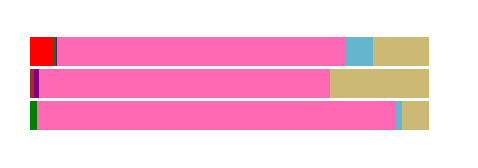

In [43]:
cancertype="OV"
dfs=[ tcga_count[cancertype], cptac_count[cancertype],nbdc_count[cancertype]]
names=["TCGA","CPTAC",  "NBDC"]
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
print(cancertype)
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=530]
CPTAC [n=98]
NBDC [n=68]


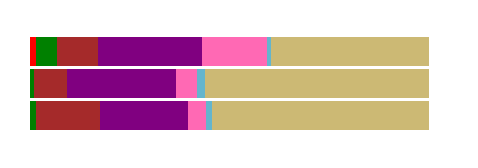

In [44]:
cancertype="UCEC"
dfs=[ tcga_count[cancertype], cptac_count[cancertype],nbdc_count[cancertype]]
names=["TCGA","CPTAC", "NBDC"]
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

# UMAP

In [45]:
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC,HNSC_KEYNOTE,SKCM_KEYNOTE,blca_bgi,blca_cornell_2016,blca_dfarber_mskcc_2014,brca_broad,brca_sanger,ccrcc_dfci_2019,coadread_dfci_2016,coadread_genentech,hnsc_broad,lgg_ucsf_2014,luad_broad,luad_mskcc_2015,mel_dfci_2019,mel_ucla_2016,mixed_allen_2018_blca,mixed_allen_2018_lung,mixed_allen_2018_mel,nsclc_mskcc_2018,paad_icgc,paad_utsw_2015,skcm_dfci_2015
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000,13.0,0.000000,2.173913,8.571429,2.040816,0.000000,0.0,0.000000,0.324675,0.000000,11.111111,0.000000,64.516129,58.064516,0.000000,0.000000,0.0,49.056604,0.689655,58.666667,0.000000,0.000000,0.925926
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,83.720930,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.784173,89.189189,0.0,0.000000,77.241379,1.333333,0.000000,0.000000,63.888889
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408,35.0,0.000000,46.739130,68.571429,85.714286,9.183673,13.0,0.000000,0.162338,1.388889,22.222222,0.000000,2.580645,3.225806,0.000000,0.000000,88.0,20.754717,0.000000,5.333333,0.000000,0.000000,0.000000
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.974026,2.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,22.058824,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020,0.0,0.000000,0.000000,1.428571,0.000000,0.000000,0.0,0.000000,18.668831,20.833333,0.000000,1.785714,0.645161,0.000000,0.719424,0.000000,0.0,0.000000,0.689655,2.666667,0.000000,0.000000,0.000000
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,4.411765,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.78431

In [46]:
col_order=total_ratio.columns

In [47]:
df_color_order=pd.DataFrame({"cancer":col_order})
df_color_order["number2"]=df_color_order["cancer"].replace({
 'SKCM':1,
 'SKCM_KEYNOTE':1,
 'mel_ucla_2016':1,
 'mixed_allen_2018_mel':1,
 'mel_dfci_2019':1,
 'skcm_dfci_2015':1,
 'blca_dfarber_mskcc_2014':2,
 'mixed_allen_2018_blca':2,
 'blca_cornell_2016':2,
 'BLCA':2,
 'CESC':0,
 'LUSC':3,
 'LUSC_CPTAC':3,
 'LIHC':0,
 'LUAD_NBDC':3,
 'mixed_allen_2018_lung':3,
 'LUAD_CPTAC':3,
 'luad_mskcc_2015':3,
 'nsclc_mskcc_2018':3,
 'LUAD':3,
 'luad_broad':3,
 'KIRC':4,
 'KIRP':4,
 'MESO':0,
 'SARC':0,
 'OV_NBDC':10,
 'ccrcc_dfci_2019':4,
 'OV_CPTAC':10,
 'OV':10,
 'KRC_CPTAC':4,
 'UCEC_NBDC':11,
 'UCEC_CPTAC':11,
 'coadread_dfci_2016':7,
 'coadread_genentech':7,
 'CRC_CPTAC':7,
 'CRC':7,
 'STAD':0,
 'brca_broad':8,
 'hnsc_mdanderson_2013':9,
 'paad_utsw_2015':6,
 'GBM':5,
 'CRC_NBDC':7,
 'lgg_ucsf_2014':5,
 'KICH':0,
 'PAAD':6,
 'PRAD':0,
 'paad_icgc':6,
 'BRN_CPTAC':5,
 'LGG':5,
 'PAAD_CPTAC':6,
 'TGCT':0,
 'UVM':0,
 'hnsc_jhu':9,
 'PCPG':0,
 'THCA':0,
 'blca_bgi':2,
 'HNSC':9,
 'HNC_CPTAC':9,
 'HNSC_KEYNOTE':9,
 'UCEC':11,
 'STAD_NBDC':0,
 'ESCA':0,
 'hnsc_broad':9,
 'ACC':0,
 'CHOL':0,
 'UCS':0,
 'brca_sanger':8,
 'BRCA_NBDC':8,
 'BRCA':8,
 "BRCA_CPTAC":8})

In [48]:
dict_number_color={0:"silver",1:"blue",2:"green",3:"red",5:"hotpink",4:"gold",6:"limegreen",7:"purple",
                   8:"c",9:"brown",10:"tab:purple",11:"tab:orange"}

In [49]:
df_color_order["TCGA"]=[1]*29 +[0]*(len(df_color_order)-29)
df_color_order.index=df_color_order["cancer"]
df_color_order["color"]=df_color_order["number2"].replace(dict_number_color)

In [50]:
fc=[]
for idx in df_color_order.index:
    if df_color_order.loc[idx,"TCGA"]==1:
        fc.append(df_color_order.loc[idx,"color"])
    else:
        fc.append("None")
df_color_order["face_color"]=fc

In [51]:
df_color_order

,cancer,number2,TCGA,color,face_color
cancer,,,,,
ACC,ACC,0,1,silver,silver
BLCA,BLCA,2,1,green,green
BRCA,BRCA,8,1,c,c
CESC,CESC,0,1,silver,silver
CHOL,CHOL,0,1,silver,silver
CRC,CRC,7,1,purple,purple
ESCA,ESCA,0,1,silver,silver
GBM,GBM,5,1,hotpink,hotpink
HNSC,HNSC,9,1,brown,brown


In [52]:
cbio_frozen_names=["blca_bgi",'brca_broad', 'brca_sanger','luad_broad', 'coadread_genentech',
'hnsc_broad','lgg_ucsf_2014','paad_icgc', 'paad_utsw_2015', ]

In [53]:
cbio_ffpe_names=['blca_cornell_2016','blca_dfarber_mskcc_2014',
        "ccrcc_dfci_2019", "coadread_dfci_2016","luad_mskcc_2015",
            "mel_dfci_2019",'mel_ucla_2016',
            'mixed_allen_2018_blca','mixed_allen_2018_mel','mixed_allen_2018_lung',
            "nsclc_mskcc_2018","skcm_dfci_2015"]

In [54]:
df_color_order["FFPE"]=(df_color_order["cancer"].isin(cbio_ffpe_names)).astype(int)

In [55]:
markers=[]
for idx in df_color_order.index:
    if df_color_order.loc[idx,"TCGA"]==1:
        markers.append("o")
    elif df_color_order.loc[idx,"FFPE"]==0:
        markers.append("^")
    else:
        markers.append(",")
df_color_order["marker"]=markers

In [56]:
df_color_order

,cancer,number2,TCGA,color,face_color,FFPE,marker
cancer,,,,,,,
ACC,ACC,0,1,silver,silver,0,o
BLCA,BLCA,2,1,green,green,0,o
BRCA,BRCA,8,1,c,c,0,o
CESC,CESC,0,1,silver,silver,0,o
CHOL,CHOL,0,1,silver,silver,0,o
CRC,CRC,7,1,purple,purple,0,o
ESCA,ESCA,0,1,silver,silver,0,o
GBM,GBM,5,1,hotpink,hotpink,0,o
HNSC,HNSC,9,1,brown,brown,0,o


In [57]:
df_color_order_2=df_color_order.sort_values(by=(["TCGA","number2"]),ascending=[False,True])

In [58]:
total_ratio_2=total_ratio.loc[:,df_color_order_2.index]

In [59]:
import umap

data=total_ratio_2.T
# make projecter, default
trans=umap.UMAP(random_state=3,n_components=2
                ,n_neighbors=20
                ,min_dist=0.25
                ,metric='euclidean').fit(data)

In [60]:
flag=df_color_order_2["marker"]=="o"
df_color_order_2.loc[flag,"color"]

cancer
ACC         silver
CESC        silver
CHOL        silver
ESCA        silver
KICH        silver
LIHC        silver
MESO        silver
PCPG        silver
PRAD        silver
SARC        silver
STAD        silver
TGCT        silver
THCA        silver
UCS         silver
UVM         silver
SKCM          blue
BLCA         green
LUAD           red
LUSC           red
KIRC          gold
KIRP          gold
GBM        hotpink
LGG        hotpink
PAAD     limegreen
CRC         purple
BRCA             c
HNSC         brown
OV      tab:purple
UCEC    tab:orange
Name: color, dtype: object

[]

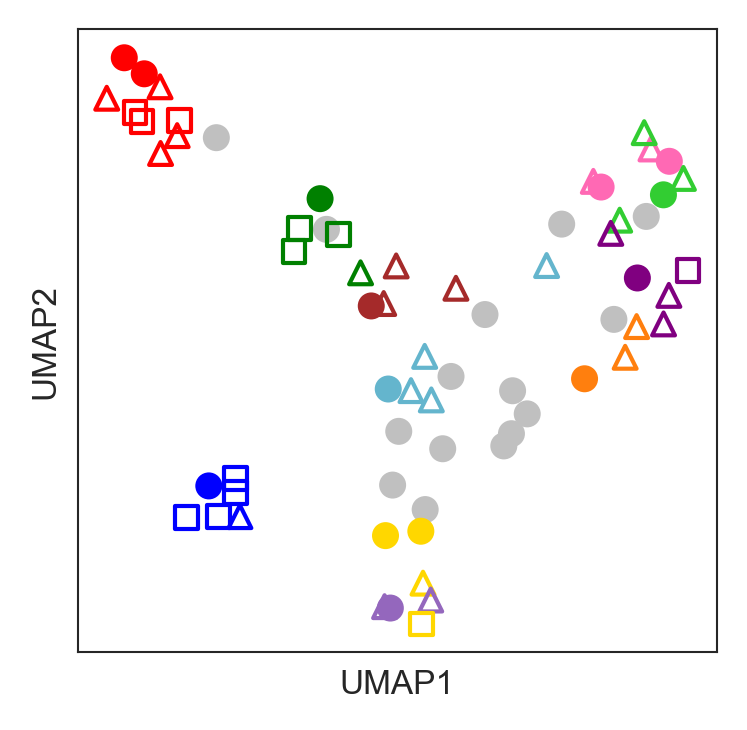

In [61]:
X=trans.transform(data)
# plot
flag=df_color_order_2["marker"]=="o"
fig = plt.figure(figsize=(2.75,2.75))
ax = fig.add_subplot(1,1,1)    
ax.scatter(X[flag, 0], X[flag, 1],c=df_color_order_2.loc[flag,"color"],s=30,lw=1)

flag=df_color_order_2["marker"]=="^"
ax.scatter(X[flag, 0], X[flag, 1],marker="^",ec=df_color_order_2.loc[flag,"color"],fc="None",s=30,lw=1)

flag=df_color_order_2["marker"]==","
ax.scatter(X[flag, 0], X[flag, 1],marker=",",ec=df_color_order_2.loc[flag,"color"],fc="None",s=30,lw=1)




ax.set_xlabel("UMAP1",fontsize=8)
ax.set_ylabel("UMAP2",fontsize=8)
ax.set_xticks([])
ax.set_yticks([])



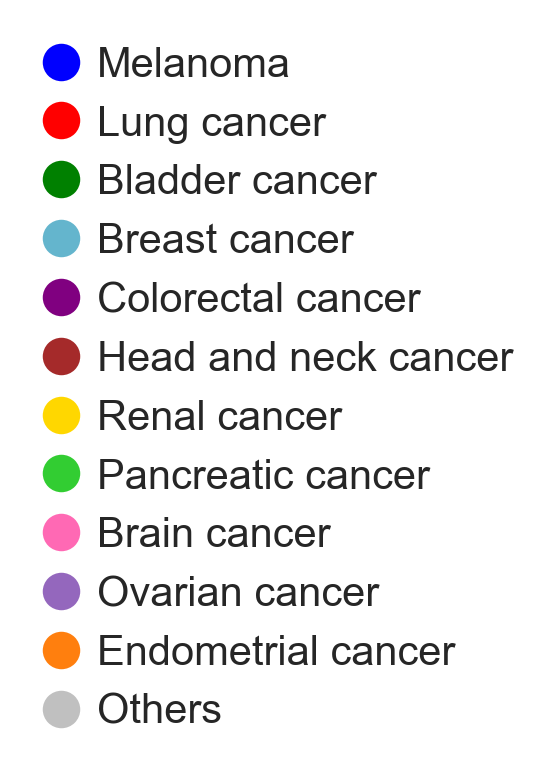

In [62]:
lg_labels=["Melanoma","Lung cancer","Bladder cancer","Breast cancer","Colorectal cancer",
           "Head and neck cancer","Renal cancer","Pancreatic cancer","Brain cancer",
           "Ovarian cancer","Endometrial cancer","Others"]
lg_colors=["blue","red","green","c","purple","brown","gold","limegreen","hotpink","tab:purple","tab:orange","silver"]


from matplotlib.lines import Line2D
custom_legends =[ Line2D([0],[0],marker='o',markerfacecolor=lg_colors[i],markersize=10,# markeredgecolor="k",
                        label=lg_labels[i],
                        color="w"
                        ) for i in range(len(lg_labels)) ]


# plot
plt.figure(figsize=(1,1))
plt.legend(handles=custom_legends,loc="center",title="",fontsize=10,
           frameon=False,edgecolor="k", handlelength=0.7
           ,labelspacing=0.5,handletextpad=0.5) # h
plt.gca().set_axis_off()

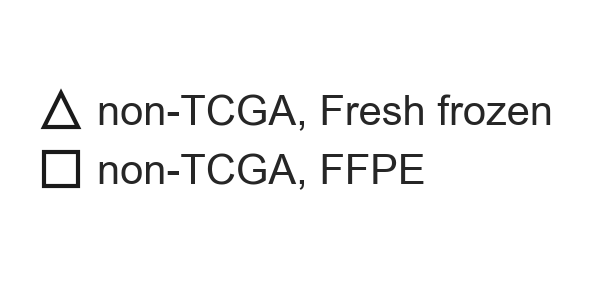

In [63]:
lg_labels=["non-TCGA, Fresh frozen","non-TCGA, FFPE"]
lg_colors=["k","k"]
lg_markers=["^","s"]


from matplotlib.lines import Line2D
custom_legends =[ Line2D([0],[0],marker=lg_markers[i],markerfacecolor="w",markersize=8,
                         markeredgecolor="k",
                        label=lg_labels[i],
                        color="w"
                        ) for i in range(len(lg_labels)) ]


# plot
plt.figure(figsize=(1,1))
plt.legend(handles=custom_legends,loc="center",title="",fontsize=10,
           frameon=False,edgecolor="k", handlelength=0.7
           ,labelspacing=0.5,handletextpad=0.5) # h
plt.gca().set_axis_off()

# Concordance ratio

In [64]:
keynotes["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in keynotes["Details"]]
counter=Counter( keynotes["top_count"]).most_common()
counter

[(4, 261), (3, 38), (2, 12)]

<ipython-input-65-cfec80fe95ea>:8: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  ax.pie(counts, labels=labels, colors=colors, autopct=None,


3.858520900321544


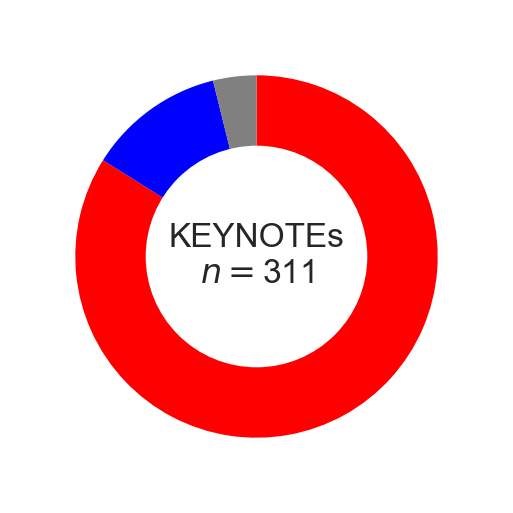

In [65]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3",""]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"KEYNOTEs\n$n=$"+str(len(keynotes)).format(len(keynotes)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)

In [66]:
cptac["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in cptac["Details"] ]
counter=Counter( cptac["top_count"]).most_common()
counter

[(4, 953), (3, 94), (2, 44)]

<ipython-input-67-337229309880>:8: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  ax.pie(counts, labels=labels, colors=colors, autopct=None,


4.032997250229148


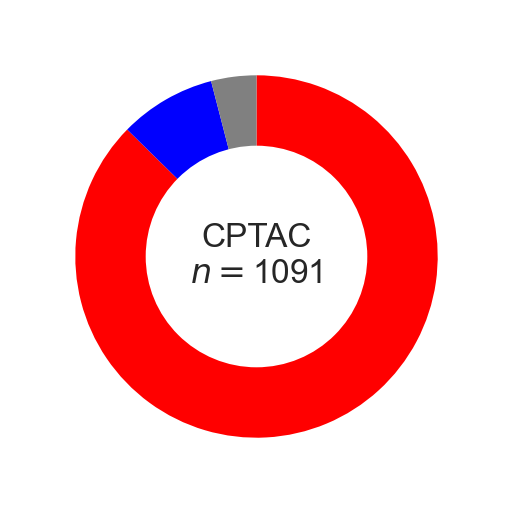

In [67]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"CPTAC\n$n=$"+str(len(cptac)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)
#ax.set_title("KEYTNOTEs",fontsize=10,backgroundcolor=dict_cluster_colors[name],color="w",fontweight="bold")
#plt.savefig(store+"pie_chart_8cluster_cancertype_0.png",dpi=300,bbox_inches="tight")

In [68]:
nbdc["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in nbdc["Details"] ]
counter=Counter( nbdc["top_count"]).most_common()
counter

[(4, 335), (3, 68), (2, 10)]

<ipython-input-69-c7c56b1e2853>:8: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  ax.pie(counts, labels=labels, colors=colors, autopct=None,


2.4213075060532687


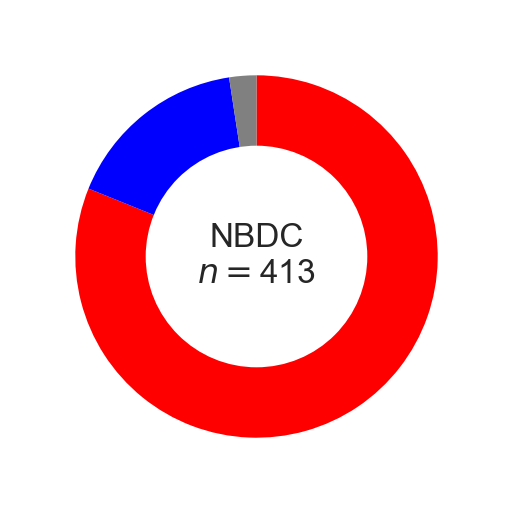

In [69]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"NBDC\n$n=$"+str(len(nbdc)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)
#ax.set_title("KEYTNOTEs",fontsize=10,backgroundcolor=dict_cluster_colors[name],color="w",fontweight="bold")
#plt.savefig(store+"pie_chart_8cluster_cancertype_0.png",dpi=300,bbox_inches="tight")

In [70]:
top_counts=[]
for name in cbio_ffpe_names:
    path_to_file="../data/tgs_results/"+name+"_tgs.tsv"
    tmp_df=pd.read_csv(path_to_file,sep="\t")
    tmp_df.rename(columns={"Unnamed: 0":name},inplace=True)
    top_count=[ int( x.split(",")[0].split(":")[1]) for x in tmp_df["Details"] ]
    top_counts.extend(top_count)

In [71]:
Counter(top_counts)

Counter({4: 1304, 3: 75, 2: 32})

<ipython-input-72-97bd46bab315>:9: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  ax.pie(counts, labels=labels, colors=colors, autopct=None,


2.2678951098511693


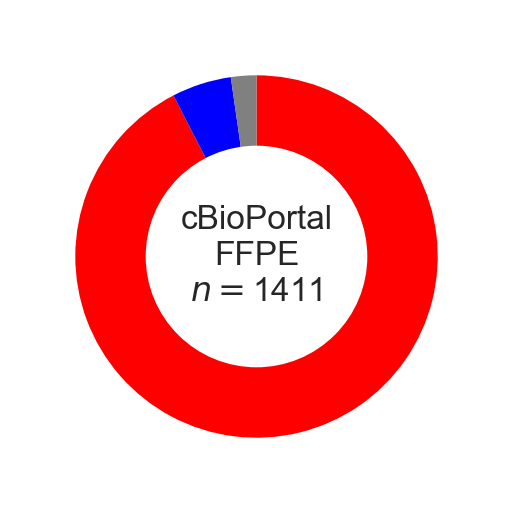

In [72]:
counter=Counter( top_counts).most_common()
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"cBioPortal\nFFPE\n$n=$"+str(len(top_counts)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)

[(4, 775), (3, 73), (2, 27)]
3.085714285714286


<ipython-input-73-6de3819fa78b>:19: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  ax.pie(counts, labels=labels, colors=colors, autopct=None,


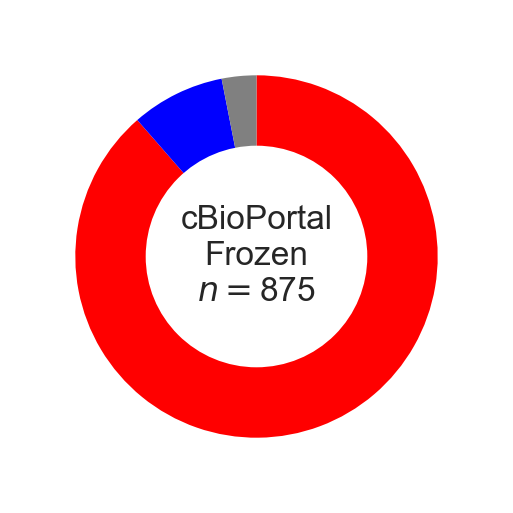

In [73]:
top_counts=[]
for name in cbio_frozen_names:
    path_to_file="../data/tgs_results/"+name+"_tgs.tsv"
    tmp_df=pd.read_csv(path_to_file,sep="\t")
    tmp_df.rename(columns={"Unnamed: 0":name},inplace=True)
    top_count=[ int( x.split(",")[0].split(":")[1]) for x in tmp_df["Details"] ]
    top_counts.extend(top_count)
    
counter=Counter( top_counts).most_common()
print(counter)

# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"cBioPortal\nFrozen\n$n=$"+str(len(top_counts)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)

# CPTAC

In [74]:
cptac=pd.read_csv("../data/CPTAC_integrated.tsv",
                  sep="\t")

In [75]:
cptac.shape

(1091, 153)

In [76]:
cptac["ID3_ratio_z"]=stats.zscore( cptac["ID3_ratio"] )
cptac["ID6_ratio_z"]=stats.zscore( cptac["ID6_ratio"] )

In [77]:
cptac["TMB_log10"]=np.log10( cptac["Missense_Mutation"]+1 )
cptac["TMB_log10_z"]=stats.zscore( cptac["TMB_log10"] )

In [78]:
cptac["Female"]=(cptac["gender"]=="female").astype(int)

In [79]:
apb_list=list(cptac.columns[cptac.columns.str.contains("APOBEC3.*_log")])

In [80]:
irs_list=["CD8A_log","GZMB_log","IFNG_log",
          #"CD274_log","PDCD1_log","CTLA4_log",
          "CXCL9_log",
          "CXCL13_log","CYT_log","GEP_score"]

In [81]:
for irs in irs_list:
    cptac.loc[:,irs+"_z"]=stats.zscore(cptac.loc[:,irs],nan_policy="omit")

In [82]:
for apb in apb_list:
    cptac.loc[:,apb+"_z"]=stats.zscore(cptac.loc[:,apb],nan_policy="omit")

In [83]:
irs_list_z=[x+"_z" for x in irs_list]
apb_list_z=[x+"_z" for x in apb_list]

In [84]:
cluster_orders_c=['SMK','APB','MRD', 'HRD', 'AGE']

In [85]:
cptac_c=cptac[cptac["TGS"].isin(cluster_orders_c)]

In [86]:
category_ratio=cptac.groupby("TGS").mean()[["Smoking"]].T*100
category_ratio=category_ratio.loc[:,cluster_orders_c]
category_ratio

TGS,SMK,APB,MRD,HRD,AGE
Smoking,67.586207,45.714286,12.903226,25.242718,25.816993


In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
mm=MinMaxScaler()
category_ratio_a=pd.DataFrame(mm.fit_transform(category_ratio.T)).T
category_ratio_a

,0,1,2,3,4
0,1.0,0.600023,0.0,0.225655,0.236157


0


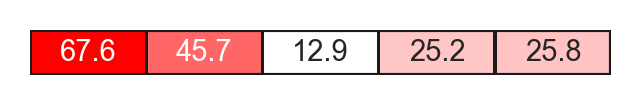

In [89]:
sns_df=category_ratio_a
annot_df=category_ratio
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(2.5,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=1,vmin=0,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=wr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in sns_df.index:
    print(i)

In [90]:
cont_list=["TMB_log10_z"]
plt_df=cptac_c.copy()
mean_by_cluster=plt_df[cont_list+["TGS"]].groupby("TGS").mean().T
mean_by_cluster=mean_by_cluster.loc[:,cluster_orders_c]
mean_by_cluster

TGS,SMK,APB,MRD,HRD,AGE
TMB_log10_z,1.060833,0.488157,1.903319,-0.127632,-0.519388


In [91]:
cont_list=["TMB_log10"]
mean_by_cluster_raw=cptac_c[cont_list+["TGS"]].groupby("TGS").mean().T
mean_by_cluster_raw=mean_by_cluster_raw.loc[:,cluster_orders_c]
mean_by_cluster_raw

TGS,SMK,APB,MRD,HRD,AGE
TMB_log10,2.337087,2.057731,2.748057,1.757345,1.566244


TMB_log10_z


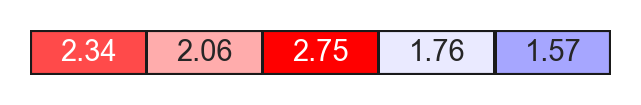

In [92]:
sns_df=mean_by_cluster
annot_df=mean_by_cluster_raw
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(2.5,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=1.5,vmin=-1.5,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=bwr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in sns_df.index:
    print(i)

In [93]:
plt_df=cptac_c.copy()
mean_by_cluster=plt_df[irs_list_z+["TGS"]].groupby("TGS").mean().T
mean_by_cluster=mean_by_cluster.loc[:,cluster_orders_c]
mean_by_cluster

TGS,SMK,APB,MRD,HRD,AGE
CD8A_log_z,0.286902,0.334971,0.328076,0.118693,-0.304810
GZMB_log_z,0.615114,0.555714,0.580909,-0.086756,-0.335923
IFNG_log_z,0.517948,0.475679,0.567103,-0.070095,-0.338897
CXCL9_log_z,0.256468,0.622236,0.516835,0.176521,-0.380995
CXCL13_log_z,0.471951,0.762269,0.425031,-0.010616,-0.305558
CYT_log_z,0.408421,0.328417,0.383832,0.042219,-0.339886
GEP_score_z,0.386770,0.541411,0.231275,0.071219,-0.342246


In [94]:
mean_by_cluster_raw=cptac_c[irs_list+["TGS"]].groupby("TGS").mean().T
mean_by_cluster_raw=mean_by_cluster_raw.loc[:,cluster_orders_c]
mean_by_cluster_raw

TGS,SMK,APB,MRD,HRD,AGE
CD8A_log,1.460845,1.492852,1.488261,1.348843,1.066853
GZMB_log,2.064157,2.011430,2.033795,1.441135,1.219959
IFNG_log,0.807019,0.785597,0.831931,0.509000,0.372771
CXCL9_log,2.857606,3.343398,3.203410,2.751424,2.010963
CXCL13_log,2.087752,2.437314,2.031257,1.506710,1.151580
CYT_log,2.089196,2.029240,2.070769,1.814758,1.528401
GEP_score,45.522846,46.961032,44.076719,42.588167,38.742881


CD8A_log_z
GZMB_log_z
IFNG_log_z
CXCL9_log_z
CXCL13_log_z
CYT_log_z
GEP_score_z


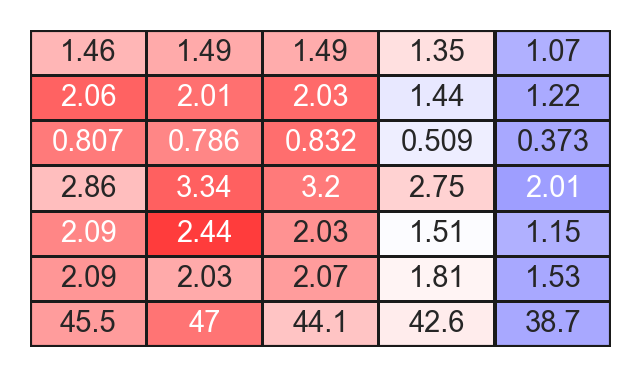

In [95]:
sns_df=mean_by_cluster
annot_df=mean_by_cluster_raw
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(2.5,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=1,vmin=-1,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=bwr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in sns_df.index:
    print(i)

In [96]:
plt_df=cptac_c.copy()
mean_by_cluster=plt_df[apb_list_z+["TGS"]].groupby("TGS").mean().T
mean_by_cluster=mean_by_cluster.loc[:,cluster_orders_c]
mean_by_cluster

TGS,SMK,APB,MRD,HRD,AGE
APOBEC3A_log_z,0.368967,1.009190,-0.129524,-0.113729,-0.224158
APOBEC3B_log_z,0.334197,0.868444,0.271345,0.086388,-0.257276
APOBEC3C_log_z,0.342353,0.433224,-0.211256,0.127090,-0.226734
APOBEC3D_log_z,0.462201,0.585360,0.096521,-0.018629,-0.295830
APOBEC3F_log_z,0.406887,0.303621,0.148792,0.090290,-0.283556
APOBEC3G_log_z,0.174398,0.485098,0.015101,0.267514,-0.321949
APOBEC3H_log_z,0.151615,0.334134,0.147104,0.185827,-0.260148


In [97]:
mean_by_cluster_raw=cptac_c[apb_list+["TGS"]].groupby("TGS").mean().T
mean_by_cluster_raw=mean_by_cluster_raw.loc[:,cluster_orders_c]
mean_by_cluster_raw

TGS,SMK,APB,MRD,HRD,AGE
APOBEC3A_log,0.953523,1.418163,0.591745,0.603207,0.523064
APOBEC3B_log,1.450373,1.853594,1.402936,1.263340,1.003961
APOBEC3C_log,2.421026,2.467942,2.135198,2.309886,2.127207
APOBEC3D_log,1.311778,1.365791,1.151405,1.100904,0.979335
APOBEC3F_log,1.140921,1.109284,1.061852,1.043929,0.929399
APOBEC3G_log,1.584884,1.742551,1.504048,1.632137,1.333010
APOBEC3H_log,0.621526,0.680692,0.620063,0.632616,0.488047


APOBEC3A_log_z
APOBEC3B_log_z


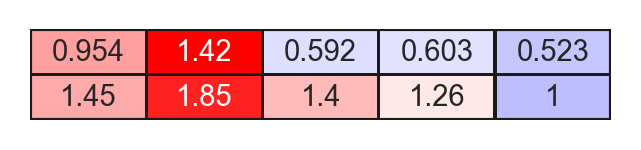

In [98]:
sns_df=mean_by_cluster.iloc[0:2,:]
annot_df=mean_by_cluster_raw.iloc[0:2,:]
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(2.5,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=1,vmin=-1,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=bwr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in sns_df.index:
    print(i)

SMK vs HRD P= 9.84e-25


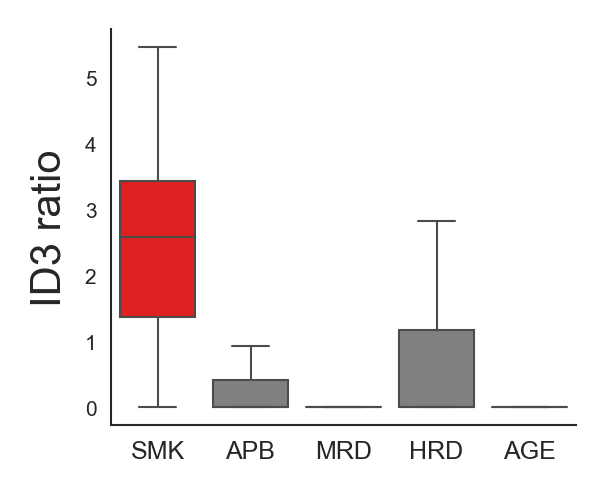

In [99]:
fig=plt.figure(figsize=(2,1.75))
ax=fig.add_subplot(111)
sns_df=cptac.copy()
cat="TGS"
val="ID3_ratio"
colors=["red"]+["grey"]*7
ax=sns.boxplot(x=cat,y=val,data=sns_df,sym="",boxprops={"alpha":1},palette=colors,order=cluster_orders_c)
#sns.swarmplot(x=cat,y=val,data=sns_df)
ax.set_xlabel("")
ax.set_ylabel("ID3 ratio",fontsize=10)
ax.set_title("",fontsize=10)
ax.tick_params(axis="y",labelsize=5)
ax.tick_params(axis="x",labelsize=6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

a=sns_df[sns_df[cat]=="SMK"][val].values
b=sns_df[sns_df[cat]=="HRD"][val].values
_,p=stats.mannwhitneyu(a,b)

print("SMK vs HRD","P= {:.2e}".format(p))

AGE vs HRD P= 1.03e-08


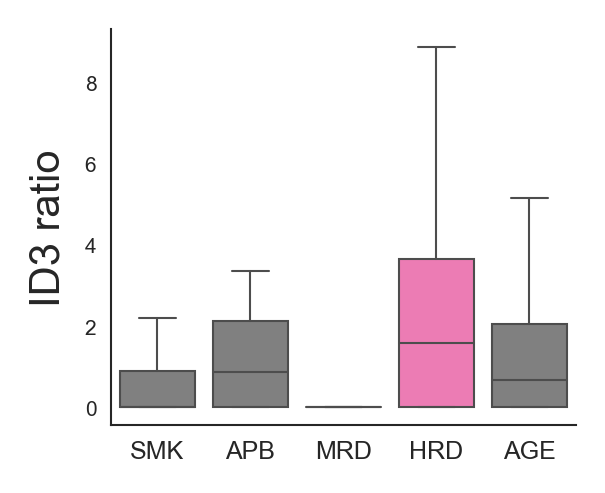

In [100]:
fig=plt.figure(figsize=(2,1.75))
ax=fig.add_subplot(111)
sns_df=cptac.copy()
cat="TGS"
val="ID6_ratio"
colors=["grey"]*3+["hotpink"]+["grey"]
ax=sns.boxplot(x=cat,y=val,data=sns_df,sym="",boxprops={"alpha":1},palette=colors,order=cluster_orders_c)
#sns.swarmplot(x=cat,y=val,data=sns_df)
ax.set_xlabel("")
ax.set_ylabel("ID3 ratio",fontsize=10)
ax.set_title("",fontsize=10)
ax.tick_params(axis="y",labelsize=5)
ax.tick_params(axis="x",labelsize=6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

a=sns_df[sns_df[cat]=="AGE"][val].values
b=sns_df[sns_df[cat]=="HRD"][val].values
_,p=stats.mannwhitneyu(a,b)

print("AGE vs HRD","P= {:.2e}".format(p))

In [101]:
plt_df=cptac_c.copy()
mean_by_cluster=plt_df[["ID3_ratio_z","ID6_ratio_z"]+["TGS"]].groupby("TGS").mean().T
mean_by_cluster=mean_by_cluster.loc[:,cluster_orders_c]
mean_by_cluster

TGS,SMK,APB,MRD,HRD,AGE
ID3_ratio_z,1.194509,-0.26813,-0.564225,0.028424,-0.270811
ID6_ratio_z,-0.421167,-0.03227,-0.710795,0.547281,-0.016076


In [102]:
mean_by_cluster_raw=cptac_c[["ID3_ratio","ID6_ratio"]+["TGS"]].groupby("TGS").mean().T
mean_by_cluster_raw=mean_by_cluster_raw.loc[:,cluster_orders_c]
mean_by_cluster_raw

TGS,SMK,APB,MRD,HRD,AGE
ID3_ratio,2.348182,0.395333,0.0,0.791279,0.391754
ID6_ratio,0.505417,1.184064,0.0,2.195411,1.212322


ID3_ratio_z
ID6_ratio_z


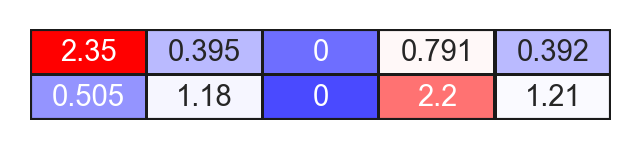

In [103]:
sns_df=mean_by_cluster.iloc[0:2,:]
annot_df=mean_by_cluster_raw.iloc[0:2,:]
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(2.5,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=1,vmin=-1,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=bwr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in sns_df.index:
    print(i)

([], [])

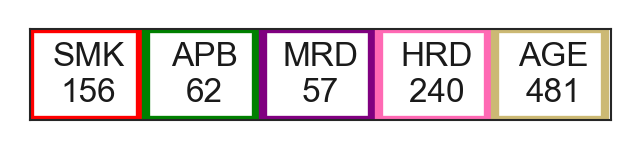

In [104]:
n=5
counter=Counter(cptac_c["TGS"])
names=cluster_orders_c
labels=[name+"\n{}".format(counter[name]) for name in names]
colors=[dict_cluster_colors[x] for x in names]


fig = plt.figure(figsize=(2.5,0.4))
ax = fig.add_subplot(111)
for i,color in enumerate(colors):
    r=patches.Rectangle(xy=(i/n,0),width=1/(n+0.3),height=1,edgecolor=color,facecolor="w",lw=2)
    ax.add_patch(r)
    text=labels[i]
    ax.text(x=(i+0.5)/n,y=0.5,s=text,fontsize=8, ha="center",va="center", color="k")

plt.xticks([])
plt.yticks([])
#plt.savefig(store+"table_labels.png",dpi=300,bbox_inches="tight")

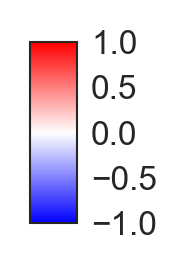

In [105]:
# colorbar
from matplotlib.colors import Normalize, TwoSlopeNorm
from matplotlib.colorbar import ColorbarBase
cmap=bwr
vmin=-1
vmax=1
bounds=[-1,-0.5,0,0.5,1]
fontsize=8
label=""
orientation='vertical'
norm = Normalize(vmin=vmin, vmax=vmax)

fig=plt.figure(figsize=(0.2,0.8))
ax=fig.add_subplot(111)
cbar = ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)#,labelleft=True,labelright=False)